In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from astropy.wcs import WCS
from reproject import reproject_interp
from astropy.wcs.utils import proj_plane_pixel_scales as pixscales
import numpy as np
import pandas as pd
import glob
import astropy.units as u
from astropy.coordinates import SkyCoord
# conda install photutils -c astropy
from photutils.aperture import aperture_photometry
from photutils.aperture import SkyCircularAperture
from matplotlib.ticker import MultipleLocator
from sklearn.datasets import load_iris
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, ConstantKernel
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel


In [3]:
pip= '/Users/seftekh1/sofia_redux/hawc/sofia_redux/instruments/hawc/data/skycals/fs15/'
pipDflat = glob.glob(pip+'/sflat_*D*.fits')

scflat = '/Users/seftekh1/Desktop/highTemp/F892_raw_D/F0892_HA_POL_09004849_HAWDHWPD_SCL_074-109.fits'

p = fits.open(pipDflat[0])
s = fits.open(scflat)

p.info(), s.info()

Filename: /Users/seftekh1/sofia_redux/hawc/sofia_redux/instruments/hawc/data/skycals/fs15/sflat_D_D_F445_119-121_v1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  R ARRAY GAIN    1 PrimaryHDU      13   (64, 41)   float64   
  1  T ARRAY GAIN    1 ImageHDU         8   (64, 41)   float64   
  2  R BAD PIXEL MASK    1 ImageHDU         8   (64, 41)   float64   
  3  T BAD PIXEL MASK    1 ImageHDU         8   (64, 41)   float64   
Filename: /Users/seftekh1/Desktop/highTemp/F892_raw_D/F0892_HA_POL_09004849_HAWDHWPD_SCL_074-109.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  R ARRAY GAIN    1 PrimaryHDU     280   (64, 41)   float64   
  1  T ARRAY GAIN    1 ImageHDU         8   (64, 41)   float64   
  2  R BAD PIXEL MASK    1 ImageHDU         8   (64, 41)   int64   
  3  T BAD PIXEL MASK    1 ImageHDU         8   (64, 41)   int64   


(None, None)

In [4]:
prg = p[0].data
ptg = p[1].data
prb = p[2].data
ptb = p[3].data


srg = s[0].data
stg = s[1].data
srb = s[2].data
stb = s[3].data

# np.shape(srg), np.shape(srb),np.shape(prg),np.shape(prb),np.shape(ptg),np.shape(ptb)


sflat_info = {}#pd.DataFrame()
pflat_info = {}#pd.DataFrame()

sflat_info['R Min'] = np.nanmin(srg)#(sflat['R Gain Data'])
sflat_info['R Max'] = np.nanmax(srg)#(sflat['R Gain Data'])
sflat_info['R Median'] = np.nanmedian(srg)#(sflat['R Gain Data'])
sflat_info['R StdDev'] = np.nanstd(srg)#(sflat['R Gain Data'])
sflat_info['T Min'] = np.nanmin(stg)#(sflat['T Gain Data'])
sflat_info['T Max'] = np.nanmax(stg)#(sflat['T Gain Data'])
sflat_info['T Median'] = np.nanmedian(stg)#(sflat['T Gain Data'])
sflat_info['T StdDev'] = np.nanstd(stg)#(sflat['T Gain Data'])


pflat_info['R Min'] = np.nanmin(prg)#(sflat['R Gain Data'])
pflat_info['R Max'] = np.nanmax(prg)#(sflat['R Gain Data'])
pflat_info['R Median'] = np.nanmedian(prg)#(sflat['R Gain Data'])
pflat_info['R StdDev'] = np.nanstd(prg)#(sflat['R Gain Data'])
pflat_info['T Min'] = np.nanmin(ptg)#(sflat['T Gain Data'])
pflat_info['T Max'] = np.nanmax(ptg)#(sflat['T Gain Data'])
pflat_info['T Median'] = np.nanmedian(ptg)#(sflat['T Gain Data'])
pflat_info['T StdDev'] = np.nanstd(ptg)#(sflat['T Gain Data'])

pflat_info, sflat_info

<ipython-input-4-ed428def2b15>:18: RuntimeWarning: All-NaN slice encountered
  sflat_info['R Min'] = np.nanmin(srg)#(sflat['R Gain Data'])
<ipython-input-4-ed428def2b15>:19: RuntimeWarning: All-NaN slice encountered
  sflat_info['R Max'] = np.nanmax(srg)#(sflat['R Gain Data'])
/Users/seftekh1/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/Users/seftekh1/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
<ipython-input-4-ed428def2b15>:22: RuntimeWarning: All-NaN slice encountered
  sflat_info['T Min'] = np.nanmin(stg)#(sflat['T Gain Data'])
<ipython-input-4-ed428def2b15>:23: RuntimeWarning: All-NaN slice encountered
  sflat_info['T Max'] = np.nanmax(stg)#(sflat['T Gain Data'])


({'R Min': 0.9220306277275085,
  'R Max': 2.704833745956421,
  'R Median': 1.1942031383514404,
  'R StdDev': 0.15561409294776704,
  'T Min': 0.8120197057723999,
  'T Max': 2.377937078475952,
  'T Median': 1.4117745161056519,
  'T StdDev': 0.23634201588194645},
 {'R Min': nan,
  'R Max': nan,
  'R Median': nan,
  'R StdDev': nan,
  'T Min': nan,
  'T Max': nan,
  'T Median': nan,
  'T StdDev': nan})

In [5]:
np.nanmin(prg)

0.9220306277275085

In [6]:
## 0.17K 
# /persistent_front/missions/2022/2022-09-21_HA_F916/raw/r0/data/si/20220921/2022-09-21_HA_F916_000_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-09-21_HA_F916/raw/r0/data/si/20220921/2022-09-21_HA_F916_001_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-09-21_HA_F916/raw/r0/data/si/20220921/2022-09-21_HA_F916_002_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-09-21_HA_F916/raw/r0/data/si/20220921/2022-09-21_HA_F916_039_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-09-21_HA_F916/raw/r0/data/si/20220921/2022-09-21_HA_F916_042_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-09-21_HA_F916/raw/r0/data/si/20220921/2022-09-21_HA_F916_073_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-09-21_HA_F916/raw/r0/data/si/20220921/2022-09-21_HA_F916_074_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-09-21_HA_F916/raw/r0/data/si/20220921/2022-09-21_HA_XXXX_000_CAL_unk_HAWD_HWPD_RAW.fits
#-------------------------
# /persistent_front/missions/2022/2022-09-29_HA_F921/raw/r0/data/si/20220929/2022-09-29_HA_F921_000_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-09-29_HA_F921/raw/r0/data/si/20220929/2022-09-29_HA_F921_001_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-09-29_HA_F921/raw/r0/data/si/20220929/2022-09-29_HA_F921_098_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-09-29_HA_F921/raw/r0/data/si/20220929/2022-09-29_HA_XXXX_000_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-09-29_HA_F921/raw/r0/data/si/20220929/2022-09-29_HA_XXXX_001_CAL_unk_HAWD_HWPD_RAW.fits
#-------------------------
# /persistent_front/missions/2022/2022-09-28_HA_F920/raw/r0/data/si/20220928/2022-09-28_HA_F920_000_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-09-28_HA_F920/raw/r0/data/si/20220928/2022-09-28_HA_F920_001_CAL_unk_HAWD_HWPD_RAW.fits
#-------------------------
# /persistent_front/missions/2022/2022-09-27_HA_F919/raw/r0/data/si/20220927/2022-09-27_HA_F919_000_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-09-27_HA_F919/raw/r0/data/si/20220927/2022-09-27_HA_F919_090_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-09-27_HA_F919/raw/r0/data/si/20220927/2022-09-27_HA_F919_131_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-09-27_HA_F919/raw/r0/data/si/20220927/2022-09-27_HA_F919_161_CAL_unk_HAWD_HWPD_RAW.fits
#-------------------------
# /persistent_front/missions/2022/2022-09-23_HA_F918/raw/r0/data/si/20220923/2022-09-23_HA_F918_000_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-09-23_HA_F918/raw/r0/data/si/20220923/2022-09-23_HA_F918_127_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-09-23_HA_F918/raw/r0/data/si/20220923/2022-09-23_HA_F918_128_CAL_unk_HAWD_HWPD_RAW.fits
#-------------------------
# /persistent_front/missions/2022/2022-09-22_HA_F917/raw/r0/data/si/20220922/2022-09-22_HA_F917_000_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-09-22_HA_F917/raw/r0/data/si/20220922/2022-09-22_HA_F917_099_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-09-22_HA_F917/raw/r0/data/si/20220922/2022-09-22_HA_F917_100_CAL_unk_HAWD_HWPD_RAW.fits
#-------------------------
# /persistent_front/missions/2022/2022-09-21_HA_F916/raw/r0/data/si/20220921/2022-09-21_HA_F916_000_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-09-21_HA_F916/raw/r0/data/si/20220921/2022-09-21_HA_F916_001_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-09-21_HA_F916/raw/r0/data/si/20220921/2022-09-21_HA_F916_002_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-09-21_HA_F916/raw/r0/data/si/20220921/2022-09-21_HA_F916_039_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-09-21_HA_F916/raw/r0/data/si/20220921/2022-09-21_HA_F916_042_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-09-21_HA_F916/raw/r0/data/si/20220921/2022-09-21_HA_F916_073_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-09-21_HA_F916/raw/r0/data/si/20220921/2022-09-21_HA_F916_074_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-09-21_HA_F916/raw/r0/data/si/20220921/2022-09-21_HA_XXXX_000_CAL_unk_HAWD_HWPD_RAW.fits
#-------------------------
# /persistent_front/missions/2022/2022-07-05_HA_F894/raw/r0/data/si/20220705/2022-07-05_HA_F894_000_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-07-05_HA_F894/raw/r0/data/si/20220705/2022-07-05_HA_F894_001_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-07-05_HA_F894/raw/r0/data/si/20220705/2022-07-05_HA_F894_002_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-07-05_HA_F894/raw/r0/data/si/20220705/2022-07-05_HA_F894_003_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-07-05_HA_F894/raw/r0/data/si/20220705/2022-07-05_HA_F894_004_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-07-05_HA_F894/raw/r0/data/si/20220705/2022-07-05_HA_F894_037_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-07-05_HA_F894/raw/r0/data/si/20220705/2022-07-05_HA_F894_139_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-07-05_HA_F894/raw/r0/data/si/20220705/2022-07-05_HA_F894_164_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-07-05_HA_F894/raw/r0/data/si/20220705/2022-07-05_HA_F894_165_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-07-05_HA_F894/raw/r1/data/si/20220705/2022-07-05_HA_F894_002_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-07-05_HA_F894/raw/r1/data/si/20220705/2022-07-05_HA_F894_003_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-07-05_HA_F894/raw/r1/data/si/20220705/2022-07-05_HA_F894_004_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-07-05_HA_F894/raw/r1/data/si/20220705/2022-07-05_HA_F894_037_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-07-05_HA_F894/raw/r1/data/si/20220705/2022-07-05_HA_F894_139_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-07-05_HA_F894/raw/r1/data/si/20220705/2022-07-05_HA_F894_164_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-07-05_HA_F894/raw/r1/data/si/20220705/2022-07-05_HA_F894_165_CAL_unk_HAWD_HWPD_RAW.fits
#-------------------------
# /persistent_front/missions/2021/2021-12-09_HA_F802/raw/r0/data/si/20211209/2021-12-09_HA_F802_026_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2021/2021-12-09_HA_F802/raw/r0/data/si/20211209/2021-12-09_HA_F802_200_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2021/2021-12-09_HA_F802/raw/r0/data/si/20211209/2021-12-09_HA_F802_209_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2021/2021-12-09_HA_F802/raw/r0/data/si/20211209/2021-12-09_HA_F802_210_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2021/2021-12-09_HA_F802/raw/r0/data/si/20211209/2021-12-09_HA_F802_211_CAL_unk_HAWD_HWPD_RAW.fits
#-------------------------
# /persistent_front/missions/2021/2021-05-19_HA_F734/raw/r0/data/si/20210519/2021-05-19_HA_F734_001_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2021/2021-05-19_HA_F734/raw/r0/data/si/20210519/2021-05-19_HA_F734_002_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2021/2021-05-19_HA_F734/raw/r0/data/si/20210519/2021-05-19_HA_F734_051_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2021/2021-05-19_HA_F734/raw/r0/data/si/20210519/2021-05-19_HA_F734_052_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2021/2021-05-19_HA_F734/raw/r0/data/si/20210519/2021-05-19_HA_F734_097_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2021/2021-05-19_HA_F734/raw/r0/data/si/20210519/2021-05-19_HA_F734_098_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2021/2021-05-19_HA_F734/raw/r0/data/si/20210519/2021-05-19_HA_F734_099_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2021/2021-05-19_HA_F734/raw/r0/data/si/20210519/2021-05-19_HA_F734_175_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2021/2021-05-19_HA_F734/raw/r0/data/si/20210519/2021-05-19_HA_F734_176_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2021/2021-05-19_HA_F734/raw/r0/data/si/20210519/2021-05-19_HA_F734_199_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2021/2021-05-19_HA_F734/raw/r0/data/si/20210519/2021-05-19_HA_F734_200_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2021/2021-05-19_HA_F734/raw/r0/data/si/20210519/2021-05-19_HA_F734_201_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2021/2021-05-19_HA_F734/raw/r0/data/si/20210519/2021-05-19_HA_XXXX_000_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2021/2021-05-19_HA_F734/raw/r1/data/si/20210519/2021-05-19_HA_XXXX_000_CAL_unk_HAWD_HWPD_RAW.fits
#-------------------------
# T = 0.225K
#------------------------- 
# /persistent_front/missions/2022/2022-06-30_HA_F892/raw/r0/data/si/20220630/2022-06-30_HA_F892_000_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-06-30_HA_F892/raw/r0/data/si/20220630/2022-06-30_HA_F892_073_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-06-30_HA_F892/raw/r1/data/si/20220630/2022-06-30_HA_F892_073_CAL_unk_HAWD_HWPD_RAW.fits




## Reduced INTCAL products: OFT vs DMD

In [7]:
dmd = '/Users/seftekh1/Desktop/highTemp/intcals_170mK/F0916_HA_CAL_unk_HAWDHWPD_DMD_042.fits'

oft = '/Users/seftekh1/Desktop/highTemp/intcals_170mK/flats/F0916_HA_CAL_unk_HAWDHWPD_OFT_042.fits'

dm = fits.open(dmd)

of = fits.open(oft)

dm.info(), of.info()


Filename: /Users/seftekh1/Desktop/highTemp/intcals_170mK/F0916_HA_CAL_unk_HAWDHWPD_DMD_042.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     233   ()      
  1  CONFIGURATION    1 ImageHDU      1782   (1,)   int32   
  2  DEMODULATED DATA    1 BinTableHDU    221   85R x 67C   [1J, 2624D, 2624D, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1J, 1J, 1K, 1K, 1J, 1E, 1E, 1J, 1E, 1E, 1E, 1E, 1E, 1E, 1B, 1E, 1E, 1E, 1E, 1E, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1J, 1D, 1J, 1D, 1D, 1D, 1J, 1J, 1J, 2624D, 2624D, 1E, 1E, 1J, 2624D, 2624D, 2624D, 2624D, 2624E, 2624E]   
Filename: /Users/seftekh1/Desktop/highTemp/intcals_170mK/flats/F0916_HA_CAL_unk_HAWDHWPD_OFT_042.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  R ARRAY GAIN    1 PrimaryHDU     253   (64, 41)   float64   
  1  T ARRAY GAIN    1 ImageHDU         8   (64, 41)   float64   
  2  R ARRAY GAIN VAR    1 ImageHDU         8   (64, 41)   float64   
  

(None, None)

R Array Gain- median:0.9992403741601315, STD: 0.324271157311068, min: 0.3122904365545969, max: 2.964231843391779
T Array Gain- median:0.5728586811792129, STD: 0.1139461763127733, min: 0.19988465579876968, max: 1.0047075943236223
F0734_HA_CAL_unk_HAWDHWPD_OFT_052.fits
R Array Gain- median:0.8999019191005229, STD: 0.26560230219669445, min: 0.19771611148595541, max: 2.3052816050686067
T Array Gain- median:0.6022600233904769, STD: 0.11366871593382258, min: 0.20486817171541172, max: 1.3982992394377503
170mK/225mK Gain ratio R array- median:0.9056876478439738, STD: 0.11921600638612073, min: 0.4866190323144317, max: 2.2257825283733434
170mK/225mK Gains ratio T array- median:1.0370067679004977, STD: 0.15446778992639304, min: 0.6557170658021337, max: 2.0852126406803655
------------
F0802_HA_CAL_unk_HAWDHWPD_OFT_026.fits
R Array Gain- median:1.0501630259366097, STD: 0.2714669814137022, min: 0.4070103652176024, max: 2.5734510323347206
T Array Gain- median:0.7637693656310289, STD: 0.13872292790699

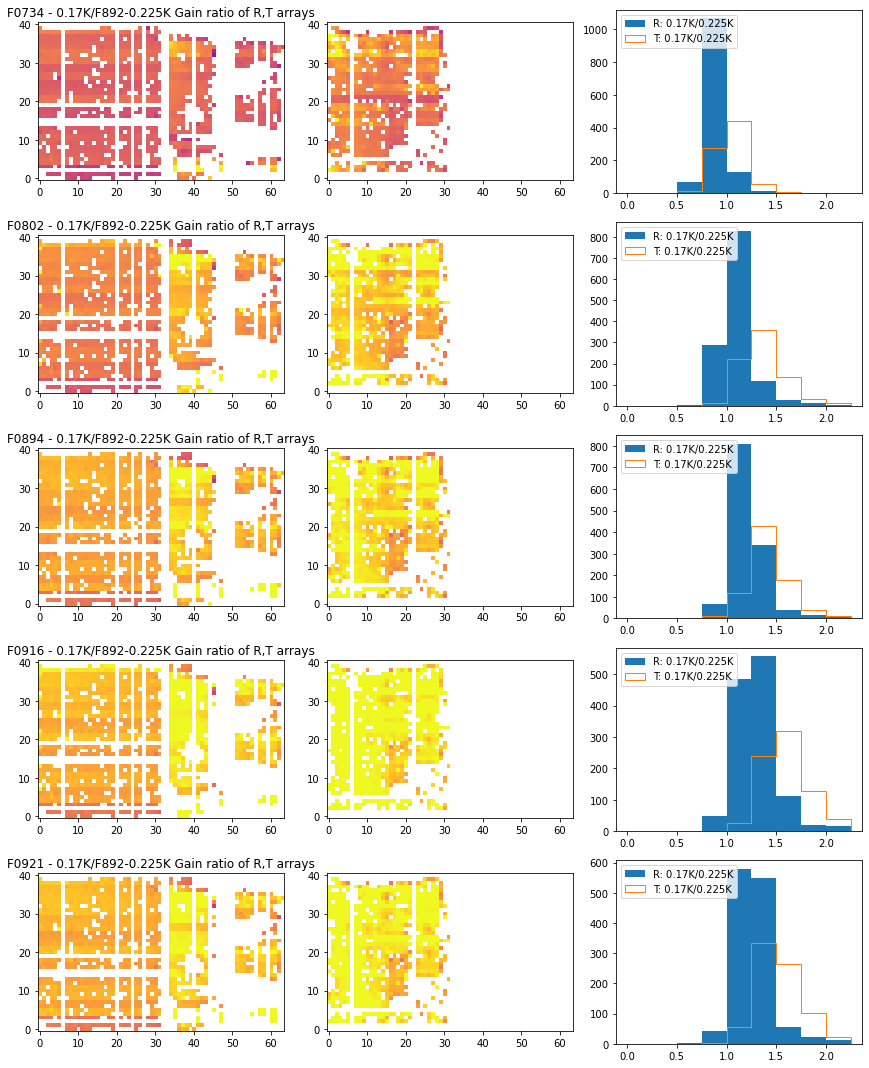

In [10]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

path = '/Users/seftekh1/Desktop/highTemp/'
nts= ['intcals_170mK/flats/F0734_HA_CAL_unk_HAWDHWPD_OFT_052.fits',
      'intcals_170mK/flats/F0802_HA_CAL_unk_HAWDHWPD_OFT_026.fits',
      'intcals_170mK/flats/F0894_HA_CAL_unk_HAWDHWPD_OFT_139.fits',
      'intcals_170mK/flats/F0916_HA_CAL_unk_HAWDHWPD_OFT_042.fits',
      'intcals_170mK/flats/F0921_HA_CAL_unk_HAWDHWPD_OFT_098.fits']


hts=['intcals_225mK/flats/F0892_HA_CAL_unk_HAWDHWPD_OFT_073.fits']

vmin=0
vmax=1.5
np.arange(vmin,vmax+1,0.5)

figure, axis = plt.subplots(nrows=5, ncols=3, figsize=(12, 15), sharex=False, sharey=False)#(4, 2,figsize=(20,10),constrained_layout = True)
h = fits.open(path+hts[0])
hrg = h[0].data
htg = h[1].data
print(('R Array Gain- median:{}, STD: {}, min: {}, max: {}').format(np.nanmedian(hrg), np.nanstd(hrg), np.nanmin(hrg), np.nanmax(hrg)))
print(('T Array Gain- median:{}, STD: {}, min: {}, max: {}').format(np.nanmedian(htg), np.nanstd(htg), np.nanmin(htg), np.nanmax(htg)))

vmin=0
vmax=1.5

for i,f in enumerate(nts):
    print((path+f).split('/')[-1])
    n = (path+f).split('/')[-1]
    fl = n.split('_')[0]
    a = fits.open(path+f)
    arg = a[0].data
    atg = a[1].data
    print(('R Array Gain- median:{}, STD: {}, min: {}, max: {}').format(np.nanmedian(arg), np.nanstd(arg), np.nanmin(arg), np.nanmax(arg)))
    print(('T Array Gain- median:{}, STD: {}, min: {}, max: {}').format(np.nanmedian(atg), np.nanstd(atg), np.nanmin(atg), np.nanmax(atg)))
    rr = arg/hrg
    tt = atg/htg
    print(('170mK/225mK Gain ratio R array- median:{}, STD: {}, min: {}, max: {}').format(np.nanmedian(rr), np.nanstd(rr), np.nanmin(rr), np.nanmax(rr)))
    print(('170mK/225mK Gains ratio T array- median:{}, STD: {}, min: {}, max: {}').format(np.nanmedian(tt), np.nanstd(tt), np.nanmin(tt), np.nanmax(tt)))
    print('------------')
    axis[i, 0].imshow(rr,cmap='plasma',vmin=vmin,vmax=vmax, origin='lower')
    axis[i, 0].set_title(fl+' - 0.17K/F892-0.225K Gain ratio of R,T arrays')
    im = axis[i, 1].imshow(tt,cmap='plasma',vmin=vmin,vmax=vmax, origin='lower')
#     divider = make_axes_locatable(axis[i, 1])
#     cax = divider.append_axes('right', size='5%', pad=0.05)
#     plt.colorbar(im,cax=cax, orientation='vertical')
    axis[i,2].hist(rr.reshape(-1), bins=np.arange(vmin,vmax+1,0.25),label='R: 0.17K/0.225K')
    axis[i,2].hist(tt.reshape(-1), bins=np.arange(vmin,vmax+1,0.25),histtype='step',label='T: 0.17K/0.225K')
    axis[i,2].legend(loc='upper left')



figure.tight_layout(pad=1.0)

R Array Gain- median:0.9992403741601315, STD: 0.324271157311068, min: 0.3122904365545969, max: 2.964231843391779
T Array Gain- median:0.5728586811792129, STD: 0.1139461763127733, min: 0.19988465579876968, max: 1.0047075943236223
F0734_HA_CAL_unk_HAWDHWPD_OFT_052.fits
R Array Gain- median:0.8999019191005229, STD: 0.26560230219669445, min: 0.19771611148595541, max: 2.3052816050686067
T Array Gain- median:0.6022600233904769, STD: 0.11366871593382258, min: 0.20486817171541172, max: 1.3982992394377503
225mK/170mK Gain ratio R array- median:1.1041334199280688, STD: 0.1258370518187412, min: 0.44928019123720253, max: 2.0549956610695084
225mK/170mK Gains ratio T array- median:0.9643138612042284, STD: 0.13587586575187702, min: 0.47956739782361907, max: 1.5250480003547071
------------
F0802_HA_CAL_unk_HAWDHWPD_OFT_026.fits
R Array Gain- median:1.0501630259366097, STD: 0.2714669814137022, min: 0.4070103652176024, max: 2.5734510323347206
T Array Gain- median:0.7637693656310289, STD: 0.1387229279069

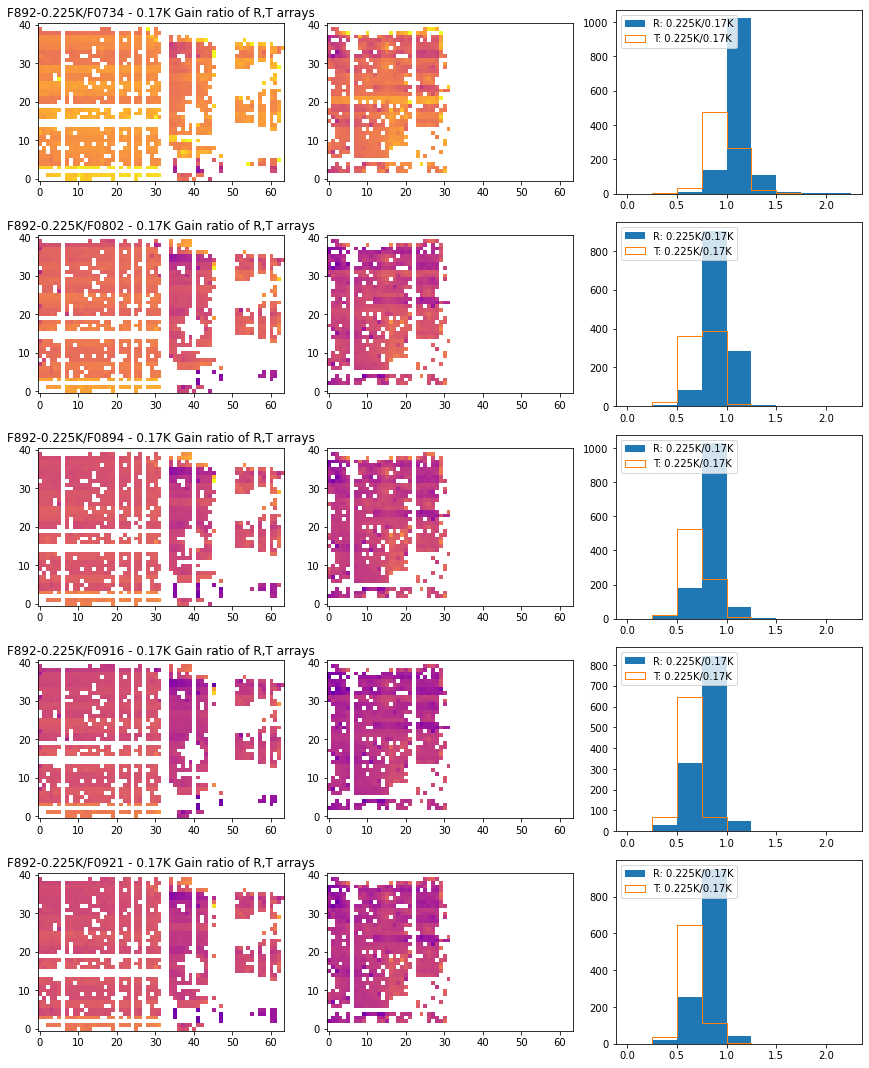

In [11]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

path = '/Users/seftekh1/Desktop/highTemp/'
nts= ['intcals_170mK/flats/F0734_HA_CAL_unk_HAWDHWPD_OFT_052.fits',
      'intcals_170mK/flats/F0802_HA_CAL_unk_HAWDHWPD_OFT_026.fits',
      'intcals_170mK/flats/F0894_HA_CAL_unk_HAWDHWPD_OFT_139.fits',
      'intcals_170mK/flats/F0916_HA_CAL_unk_HAWDHWPD_OFT_042.fits',
      'intcals_170mK/flats/F0921_HA_CAL_unk_HAWDHWPD_OFT_098.fits']


hts=['intcals_225mK/flats/F0892_HA_CAL_unk_HAWDHWPD_OFT_073.fits']

vmin=0
vmax=1.5
np.arange(vmin,vmax+1,0.5)

figure, axis = plt.subplots(nrows=5, ncols=3, figsize=(12, 15), sharex=False, sharey=False)#(4, 2,figsize=(20,10),constrained_layout = True)
h = fits.open(path+hts[0])
hrg = h[0].data
htg = h[1].data
print(('R Array Gain- median:{}, STD: {}, min: {}, max: {}').format(np.nanmedian(hrg), np.nanstd(hrg), np.nanmin(hrg), np.nanmax(hrg)))
print(('T Array Gain- median:{}, STD: {}, min: {}, max: {}').format(np.nanmedian(htg), np.nanstd(htg), np.nanmin(htg), np.nanmax(htg)))

vmin=0
vmax=1.5

for i,f in enumerate(nts):
    print((path+f).split('/')[-1])
    n = (path+f).split('/')[-1]
    fl = n.split('_')[0]
    a = fits.open(path+f)
    arg = a[0].data
    atg = a[1].data
    print(('R Array Gain- median:{}, STD: {}, min: {}, max: {}').format(np.nanmedian(arg), np.nanstd(arg), np.nanmin(arg), np.nanmax(arg)))
    print(('T Array Gain- median:{}, STD: {}, min: {}, max: {}').format(np.nanmedian(atg), np.nanstd(atg), np.nanmin(atg), np.nanmax(atg)))
    rr = hrg/arg
    tt = htg/atg
    print(('225mK/170mK Gain ratio R array- median:{}, STD: {}, min: {}, max: {}').format(np.nanmedian(rr), np.nanstd(rr), np.nanmin(rr), np.nanmax(rr)))
    print(('225mK/170mK Gains ratio T array- median:{}, STD: {}, min: {}, max: {}').format(np.nanmedian(tt), np.nanstd(tt), np.nanmin(tt), np.nanmax(tt)))
    print('------------')
    axis[i, 0].imshow(rr,cmap='plasma',vmin=vmin,vmax=vmax, origin='lower')
    axis[i, 0].set_title('F892-0.225K/'+fl+' - 0.17K Gain ratio of R,T arrays')
    im = axis[i, 1].imshow(tt,cmap='plasma',vmin=vmin,vmax=vmax, origin='lower')
#     divider = make_axes_locatable(axis[i, 1])
#     cax = divider.append_axes('right', size='5%', pad=0.05)
#     plt.colorbar(im,cax=cax, orientation='vertical')
    axis[i,2].hist(rr.reshape(-1), bins=np.arange(vmin,vmax+1,0.25),label='R: 0.225K/0.17K')
    axis[i,2].hist(tt.reshape(-1), bins=np.arange(vmin,vmax+1,0.25),histtype='step',label='T: 0.225K/0.17K')
    axis[i,2].legend(loc='upper left')



figure.tight_layout(pad=1.0) 

<ErrorbarContainer object of 3 artists>

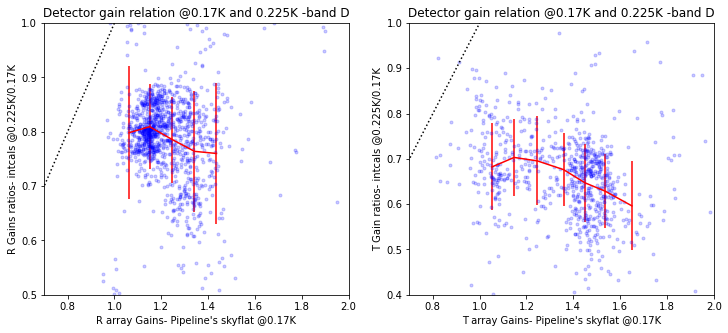

In [39]:
path = '/Users/seftekh1/Desktop/highTemp/'
f = 'intcals_170mK/flats/F0921_HA_CAL_unk_HAWDHWPD_OFT_098.fits'
hts='intcals_225mK/flats/F0892_HA_CAL_unk_HAWDHWPD_OFT_073.fits'
h = fits.open(path+hts)
hrg = h[0].data
htg = h[1].data
a = fits.open(path+f)
arg = a[0].data
atg = a[1].data
rr = hrg/arg
tt = htg/atg

pf = '/Users/seftekh1/sofia_redux/hawc/sofia_redux/instruments/hawc/data/skycals/fs15/sflat_D_D_F445_119-121_v1.fits'

a = fits.open(pf)
pfr = a[0].data
pft = a[1].data

PFR = pfr
RG = rr

PFT = pft
TG = tt
# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

figure,((ax1,ax2))= plt.subplots(nrows=1, ncols=2, figsize=(12, 5), sharex=False, sharey=False)

ax1.plot(PFR.reshape(-1), RG.reshape(-1), 'b.', alpha=0.2)
ax1.plot([0.5,2],[0.5,2], 'k:')

ax1.set_title('Detector gain relation @0.17K and 0.225K -band D')
ax1.set_xlabel("R array Gains- Pipeline's skyflat @0.17K")
ax1.set_ylabel("R Gains ratios- intcals @0.225K/0.17K")
ax1.set_xlim(0.7,2.)
ax1.set_ylim(0.5,1.)

x = []
y = []
yerr = []

for i in np.arange(1,1.5,0.1):
    
    inx = ((i < PFR) & (PFR <= i + 0.1))
    x.append(np.nanmean(PFR[inx]))
    y.append(np.nanmean(RG[inx]))
    yerr.append(np.nanstd(RG[inx]))
    
ax1.errorbar(x, y, yerr=yerr, color='red')


ax2.plot(PFT.reshape(-1), TG.reshape(-1), 'b.', alpha=0.2)
ax2.plot([0.5,1],[0.5,1], 'k:')

ax2.set_title('Detector gain relation @0.17K and 0.225K -band D')
ax2.set_xlabel("T array Gains- Pipeline's skyflat @0.17K")
ax2.set_ylabel("T Gain ratios- intcals @0.225K/0.17K")
ax2.set_xlim(0.7,2.)
ax2.set_ylim(0.4,1.)



x = []
y = []
yerr = []

for i in np.arange(1,1.6,0.1):
    
    inx = ((i < PFT) & (PFT <= i + 0.1))
    x.append(np.nanmean(PFT[inx]))
    y.append(np.nanmean(TG[inx]))
    yerr.append(np.nanstd(TG[inx]))
    
ax2.errorbar(x, y, yerr=yerr, color='red')



In [40]:
np.shape(PFR.reshape(-1)),np.shape(PFR)

((2624,), (41, 64))

<ipython-input-41-3dc66624e930>:11: RuntimeWarning: Mean of empty slice
  PFR_mean = np.nanmean(PFR[i:i+d, j:j+d])
/Users/seftekh1/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
<ipython-input-41-3dc66624e930>:13: RuntimeWarning: Mean of empty slice
  RG_mean = np.nanmean(RG[i:i+d, j:j+d])
/Users/seftekh1/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


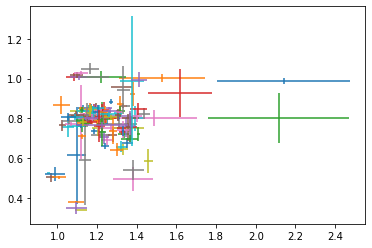

In [41]:
n, m = PFR.shape

d = 4
X = []
Y = []
Yerr = []
Xerr = []

for i in range(0, n, d):
    for j in range(0, m, d):
        PFR_mean = np.nanmean(PFR[i:i+d, j:j+d])
        PFR_std = np.nanstd(PFR[i:i+d, j:j+d])
        RG_mean = np.nanmean(RG[i:i+d, j:j+d])
        RG_std = np.nanstd(RG[i:i+d, j:j+d])        
        
        plt.errorbar(PFR_mean, RG_mean, yerr=RG_std, xerr=PFR_std)
        X.append(PFR_mean)
        Y.append(RG_mean)
        Yerr.append(RG_std)
        Xerr.append(PFR_std)

<ipython-input-66-6db6dc8e985c>:21: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  R, cov = polyfit(gg.X, gg.Y, 1, w=1./gg.Yerr, cov=True)
<ipython-input-66-6db6dc8e985c>:58: RuntimeWarning: Mean of empty slice
  PFT_mean = np.nanmean(PFT[i:i+d, j:j+d])
/Users/seftekh1/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
<ipython-input-66-6db6dc8e985c>:60: RuntimeWarning: Mean of empty slice
  TG_mean = np.nanmean(TG[i:i+d, j:j+d])
<ipython-input-66-6db6dc8e985c>:87: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  R, cov = polyfit(gg.X, gg.Y, 1, w=1./gg.Yerr, cov=True)


m=-0.03+/-0.07, b=0.86
m=-0.1+/-0.06, b=0.81


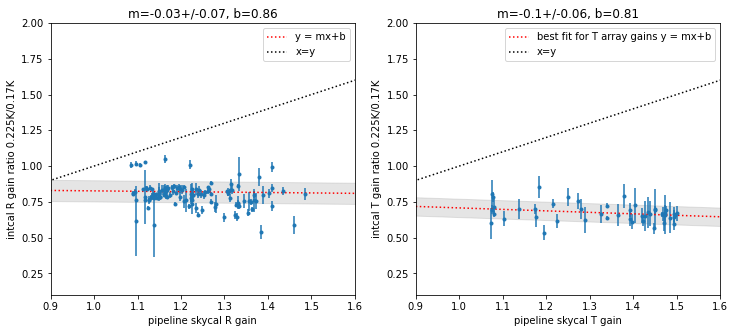

In [66]:
from scipy import polyfit


ggg = pd.DataFrame.from_dict({
    "X": X,
    "Y": Y,
    "Yerr": Yerr,
    "Xerr": Xerr,
})

gg = ggg.dropna()

# sliced, outliers are removed
gg = ggg[((ggg.Yerr<0.3)&(ggg.Xerr<0.3)&(ggg.Xerr>0)&(ggg.Yerr>0.0)&(ggg.Y<2.5)&(ggg.Y>.5)&(ggg.X>1.07)&(ggg.X<1.5))]

figure,((ax1,ax2))= plt.subplots(nrows=1, ncols=2, figsize=(12, 5), sharex=False, sharey=False)

ax1.errorbar(gg.X, gg.Y, yerr=gg.Yerr, fmt='.')


R, cov = polyfit(gg.X, gg.Y, 1, w=1./gg.Yerr, cov=True)
m, b = R

x_ = np.linspace(0.9,1.8,30)
y_ = m*x_+b

ye = np.sqrt(cov[0][0]*m**2+cov[1][1])

y_lower = y_ - ye
y_upper = y_ + ye

ax1.plot(x_, y_, 'r:',label='y = mx+b')

ax1.fill_between(x_, y_lower, y_upper,
                 color='gray', alpha=0.2)

ax1.plot([0.8,2],[0.8,2], 'k:',label='x=y')
ax1.set_ylabel('intcal R gain ratio 0.225K/0.17K')
ax1.set_xlabel('pipeline skycal R gain')
ax1.set_title('m='+str(np.round(m,2))+'+/-'+str(np.round(ye,2))+', b='+str(np.round(b,2)))
ax1.set_xlim(00.9,1.6)
ax1.set_ylim(0.1,2)
ax1.legend()
print('m='+str(np.round(m,2))+'+/-'+str(np.round(ye,2))+', b='+str(np.round(b,2)))

#-------------------------------------------------------------

n, m = PFT.shape

d = 4
Xt = []
Yt = []
Yterr = []
Xterr = []

for i in range(0, n, d):
    for j in range(0, m, d):
        PFT_mean = np.nanmean(PFT[i:i+d, j:j+d])
        PFT_std = np.nanstd(PFT[i:i+d, j:j+d])
        TG_mean = np.nanmean(TG[i:i+d, j:j+d])
        TG_std = np.nanstd(TG[i:i+d, j:j+d])        
        
#         plt.errorbar(PFT_mean, TG_mean, yerr=TG_std, xerr=PFT_std)
        Xt.append(PFT_mean)
        Yt.append(TG_mean)
        Yterr.append(TG_std)
        Xterr.append(PFT_std)


ggg = pd.DataFrame.from_dict({
    "X": Xt,
    "Y": Yt,
    "Yerr": Yterr,
    "Xerr": Xterr,
})

gg = ggg.dropna()

# sliced, outliers are removed
gg = ggg[((ggg.Yerr<0.3)&(ggg.Xerr<0.3)&(ggg.Xerr>0)&(ggg.Yerr>0.0)&(ggg.Y<2.5)&(ggg.Y>.5)&(ggg.X>1.07)&(ggg.X<1.5))]
#gg = ggg[((ggg.Yerr<0.3)&(ggg.Xerr<0.3)&(ggg.Xerr>0)&(ggg.Yerr>0.0)&(ggg.Y<2.5)&(ggg.Y>.5)&(ggg.X>1.1)&(ggg.X<1.5))]


ax2.errorbar(gg.X, gg.Y, yerr=gg.Yerr, fmt='.')


R, cov = polyfit(gg.X, gg.Y, 1, w=1./gg.Yerr, cov=True)
m, b = R

x_ = np.linspace(0.9,1.8,30)
y_ = m*x_+b

ye = np.sqrt(cov[0][0]*m**2+cov[1][1])

y_lower = y_ - ye
y_upper = y_ + ye

ax2.plot(x_, y_, 'r:',label='best fit for T array gains y = mx+b')

ax2.fill_between(x_, y_lower, y_upper,
                 color='gray', alpha=0.2)

ax2.plot([0.8,2],[0.8,2], 'k:',label='x=y')
ax2.set_ylabel('intcal T gain ratio 0.225K/0.17K')
ax2.set_xlabel('pipeline skycal T gain')
ax2.set_title('m='+str(np.round(m,2))+'+/-'+str(np.round(ye,2))+', b='+str(np.round(b,2)))
ax2.set_xlim(00.9,1.6)
ax2.set_ylim(0.1,2)
ax2.legend()
print('m='+str(np.round(m,2))+'+/-'+str(np.round(ye,2))+', b='+str(np.round(b,2)))


In [45]:
from mpl_toolkits.axes_grid1 import make_axes_locatable


figure.tight_layout(pad=1.0)# made the SCL file for every pointing of the 

fp = '/Users/seftekh1/Desktop/highTemp/sarah_sandbox/'

p451 = fp+'test_74_77/F0892_HA_POL_09004845_HAWDHWPD_SCL_074-077.fits'
p45 = fp+'F0892_HA_POL_09004845_HAWDHWPD_SCL_074-109.fits'
p46 = fp+'test_78_81/F0892_HA_POL_09004846_HAWDHWPD_SCL_078-081.fits'
p47 = fp+'test_82_85/F0892_HA_POL_09004847_HAWDHWPD_SCL_082-085.fits'
p48 = fp+'test_86_89/F0892_HA_POL_09004848_HAWDHWPD_SCL_086-089.fits'
p49 = fp+'test_90_93/F0892_HA_POL_09004849_HAWDHWPD_SCL_090-093.fits'
p50 = fp+'test_94_97/F0892_HA_POL_09004850_HAWDHWPD_SCL_094-097.fits'
p51 = fp+'test_102_105/F0892_HA_POL_09004851_HAWDHWPD_SCL_102-105.fits'

sumR = np.zeros(np.shape(arg))
sumT = np.zeros(np.shape(atg))
mydict = {}
# mycdict['atg']= {}
# mycdict['arg']= {}

for i,f in enumerate([p45,p46,p47,p48,p49,p50,p51]):
#     print(f,(f).split('/')[-1])
    n = (f).split('/')[-1]
    a = fits.open(f)
    rg = a[0].data
    rgn = np.nan_to_num(rg)
    tg = a[1].data
    tgn = np.nan_to_num(tg)
    sumR = np.add(sumR, rgn)
    sumT = np.add(sumT, tgn)

    mydict["rg_"+str(i)] = rg.reshape(-1)
    mydict["tg_"+str(i)] = tg.reshape(-1)
    
#     print(np.shape(argn),np.shape(atgn))
#     print(n, np.sum(~np.isnan(argn)))
#     print(('R Array Gain: {} pixels- median:{}, STD: {}, min: {}, max: {}').format(np.sum(~np.isnan(arg)),np.nanmedian(arg), np.nanstd(arg), np.nanmin(arg), np.nanmax(arg)))
#     print(('T Array Gain: {} pixels- median:{}, STD: {}, min: {}, max: {}').format(np.sum(~np.isnan(atg)),np.nanmedian(atg), np.nanstd(atg), np.nanmin(atg), np.nanmax(atg)))
#     print('--------------------')

In [20]:
import pandas as pd

df = pd.DataFrame.from_dict(mydict)
df.head()

,rg_0,tg_0,rg_1,tg_1,rg_2,tg_2,rg_3,tg_3,rg_4,tg_4,rg_5,tg_5
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,1.230356,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df_rg = df.apply(lambda row: np.nanmean([row["rg_"+str(i)] for i in range(6)]), axis=1)

df_tg = df.apply(lambda row: np.nanmean([row["tg_"+str(i)] for i in range(6)]), axis=1)

df["RG"] = df_rg
df["TG"] = df_tg

<ipython-input-21-919285e111f9>:1: RuntimeWarning: Mean of empty slice
  df_rg = df.apply(lambda row: np.nanmean([row["rg_"+str(i)] for i in range(6)]), axis=1)
<ipython-input-21-919285e111f9>:3: RuntimeWarning: Mean of empty slice
  df_tg = df.apply(lambda row: np.nanmean([row["tg_"+str(i)] for i in range(6)]), axis=1)


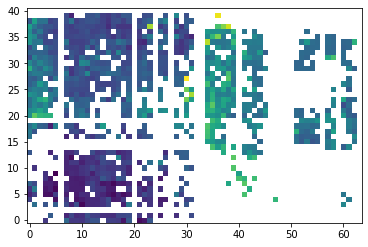

In [22]:
plt.imshow(df_rg.values.reshape(41,-1), origin='lower')

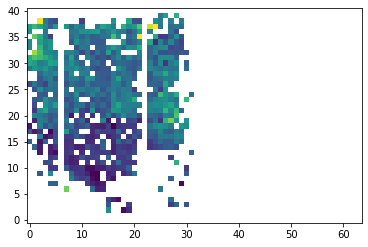

In [23]:
plt.imshow(df_tg.values.reshape(41,-1), origin='lower')

In [24]:
from scipy import signal

filt = np.zeros((2,2)) + 1./4
rg_ = signal.convolve2d(df_rg.values.reshape(41,-1), filt, mode='same')

In [25]:
rg_.shape

(41, 64)

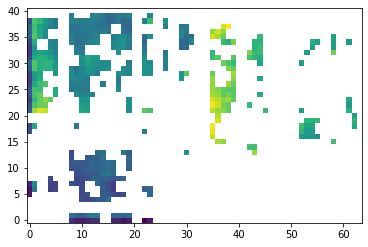

In [26]:
plt.imshow(rg_, origin='lower')

<ipython-input-28-b757cbbbfd9c>:16: RuntimeWarning: Mean of empty slice
  RG_mean = np.nanmean(RG[i:i+d, j:j+d])
/Users/seftekh1/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/seftekh1/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
<ipython-input-28-b757cbbbfd9c>:14: RuntimeWarning: Mean of empty slice
  PFR_mean = np.nanmean(PFR[i:i+d, j:j+d])


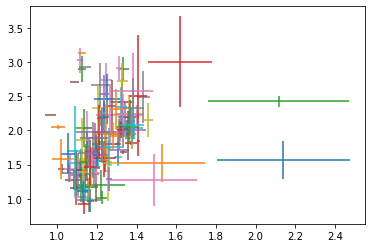

In [28]:
pf = '/Users/seftekh1/sofia_redux/hawc/sofia_redux/instruments/hawc/data/skycals/fs15/sflat_D_D_F445_119-121_v1.fits'

a = fits.open(pf)
pfr = a[0].data
pft = a[1].data

df["PFR"] = pfr.reshape(-1)
df["PFT"] = pft.reshape(-1)
df.head()

PFR = df.PFR.values.reshape(41, -1)
RG  = df.RG.values.reshape(41, -1)

n, m = PFR.shape

d = 4
X = []
Y = []
Yerr = []
Xerr = []

for i in range(0, n, d):
    for j in range(0, m, d):
        PFR_mean = np.nanmean(PFR[i:i+d, j:j+d])
        PFR_std = np.nanstd(PFR[i:i+d, j:j+d])
        RG_mean = np.nanmean(RG[i:i+d, j:j+d])
        RG_std = np.nanstd(RG[i:i+d, j:j+d])        
        
        plt.errorbar(PFR_mean, RG_mean, yerr=RG_std, xerr=PFR_std)
        X.append(PFR_mean)
        Y.append(RG_mean)
        Yerr.append(RG_std)
        Xerr.append(PFR_std)

<ipython-input-29-38869b2a5574>:19: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  R, cov = polyfit(gg.X, gg.Y, 1, w=1./gg.Yerr, cov=True)


(0.5, 3.0)

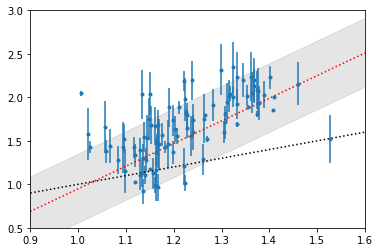

In [29]:
ggg = pd.DataFrame.from_dict({
    "X": X,
    "Y": Y,
    "Yerr": Yerr,
    "Xerr": Xerr,
})

gg = ggg.dropna()

# sliced, outliers are removed
gg = ggg[((ggg.Yerr<0.3)&(ggg.Xerr<0.3)&(ggg.Xerr>0)&(ggg.Yerr>0.0)&(ggg.Y<2.5))]

plt.errorbar(gg.X, gg.Y, yerr=gg.Yerr, fmt='.')

from scipy import polyfit



R, cov = polyfit(gg.X, gg.Y, 1, w=1./gg.Yerr, cov=True)
m, b = R

x_ = np.linspace(0.9,1.8,30)
y_ = m*x_+b

ye = np.sqrt(cov[0][0]*m**2+cov[1][1])

y_lower = y_ - ye
y_upper = y_ + ye

plt.plot(x_, y_, 'r:')

plt.fill_between(x_, y_lower, y_upper,
                 color='gray', alpha=0.2)

plt.plot([0.8,2],[0.8,2], 'k:')

plt.xlim(00.9,1.6)
plt.ylim(0.5,3)

<ipython-input-37-fb78f4b5d5a5>:25: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  R, cov = polyfit(gg.X, gg.Y, 1, w=1./gg.Yerr, cov=True)
<ipython-input-37-fb78f4b5d5a5>:64: RuntimeWarning: Mean of empty slice
  TG_mean = np.nanmean(TG[i:i+d, j:j+d])
/Users/seftekh1/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
<ipython-input-37-fb78f4b5d5a5>:62: RuntimeWarning: Mean of empty slice
  PFT_mean = np.nanmean(PFT[i:i+d, j:j+d])
<ipython-input-37-fb78f4b5d5a5>:90: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  R, cov = polyfit(gg.X, gg.Y, 1, w=1./gg.Yerr, cov=True)


m=2.6+/-0.39, b=-1.65
m=0.49+/-0.33, b=1.35


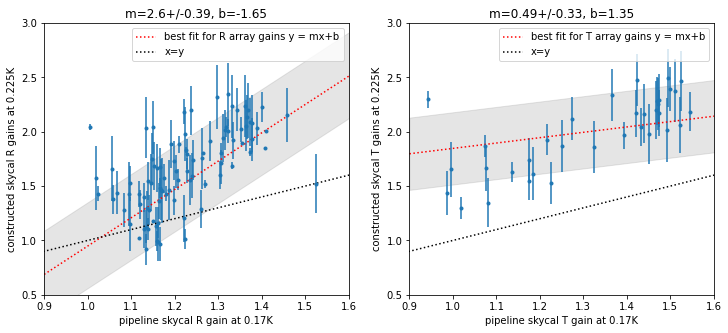

In [37]:
from scipy import polyfit
PFR = pfr
RG = rr

PFT = pft
TG  = df.TG.values.reshape(41, -1)

ggg = pd.DataFrame.from_dict({
    "X": X,
    "Y": Y,
    "Yerr": Yerr,
    "Xerr": Xerr,
})

gg = ggg.dropna()

# sliced, outliers are removed
gg = ggg[((ggg.Yerr<0.3)&(ggg.Xerr<0.3)&(ggg.Xerr>0)&(ggg.Yerr>0.0)&(ggg.Y<2.5))]

figure,((ax1,ax2))= plt.subplots(nrows=1, ncols=2, figsize=(12, 5), sharex=False, sharey=False)

ax1.errorbar(gg.X, gg.Y, yerr=gg.Yerr, fmt='.')


R, cov = polyfit(gg.X, gg.Y, 1, w=1./gg.Yerr, cov=True)
m, b = R

x_ = np.linspace(0.9,1.8,30)
y_ = m*x_+b

ye = np.sqrt(cov[0][0]*m**2+cov[1][1])

y_lower = y_ - ye
y_upper = y_ + ye

ax1.plot(x_, y_, 'r:',label='best fit for R array gains y = mx+b')

ax1.fill_between(x_, y_lower, y_upper,
                 color='gray', alpha=0.2)

ax1.plot([0.8,2],[0.8,2], 'k:',label='x=y')
ax1.set_ylabel('constructed skycal R gains at 0.225K')
ax1.set_xlabel('pipeline skycal R gain at 0.17K')
ax1.set_title('m='+str(np.round(m,2))+'+/-'+str(np.round(ye,2))+', b='+str(np.round(b,2)))
ax1.set_xlim(00.9,1.6)
ax1.set_ylim(0.5,3)
ax1.legend()
print('m='+str(np.round(m,2))+'+/-'+str(np.round(ye,2))+', b='+str(np.round(b,2)))

#-------------------------------------------------------------

n, m = PFT.shape

d = 4
Xt = []
Yt = []
Yterr = []
Xterr = []

for i in range(0, n, d):
    for j in range(0, m, d):
        PFT_mean = np.nanmean(PFT[i:i+d, j:j+d])
        PFT_std = np.nanstd(PFT[i:i+d, j:j+d])
        TG_mean = np.nanmean(TG[i:i+d, j:j+d])
        TG_std = np.nanstd(TG[i:i+d, j:j+d])        
        
#         plt.errorbar(PFT_mean, TG_mean, yerr=TG_std, xerr=PFT_std)
        Xt.append(PFT_mean)
        Yt.append(TG_mean)
        Yterr.append(TG_std)
        Xterr.append(PFT_std)


ggg = pd.DataFrame.from_dict({
    "X": Xt,
    "Y": Yt,
    "Yerr": Yterr,
    "Xerr": Xterr,
})

gg = ggg.dropna()

# sliced, outliers are removed
gg = ggg[((ggg.Yerr<0.3)&(ggg.Xerr<0.3)&(ggg.Xerr>0)&(ggg.Yerr>0.0)&(ggg.Y<2.5))]


ax2.errorbar(gg.X, gg.Y, yerr=gg.Yerr, fmt='.')


R, cov = polyfit(gg.X, gg.Y, 1, w=1./gg.Yerr, cov=True)
m, b = R

x_ = np.linspace(0.9,1.8,30)
y_ = m*x_+b

ye = np.sqrt(cov[0][0]*m**2+cov[1][1])

y_lower = y_ - ye
y_upper = y_ + ye

ax2.plot(x_, y_, 'r:',label='best fit for T array gains y = mx+b')

ax2.fill_between(x_, y_lower, y_upper,
                 color='gray', alpha=0.2)

ax2.plot([0.8,2],[0.8,2], 'k:',label='x=y')
ax2.set_ylabel('constructed skycal T gains at 0.225K')
ax2.set_xlabel('pipeline skycal T gain at 0.17K')
ax2.set_title('m='+str(np.round(m,2))+'+/-'+str(np.round(ye,2))+', b='+str(np.round(b,2)))
ax2.set_xlim(00.9,1.6)
ax2.set_ylim(0.5,3)

ax2.legend()
print('m='+str(np.round(m,2))+'+/-'+str(np.round(ye,2))+', b='+str(np.round(b,2)))


In [30]:
### slope, intercept and error in slope [coming from covariance matrix from which the weeoe is calculated]

m, b, ye, cov

(2.603034202488585,
 -1.6549074670217176,
 0.39485282061989563,
 array([[ 0.01803207, -0.02460806],
        [-0.02460806,  0.03372725]]))

<ErrorbarContainer object of 3 artists>

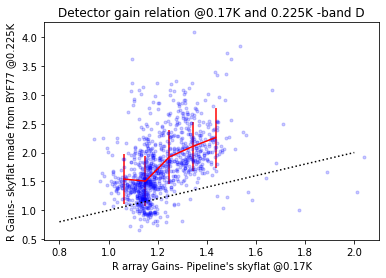

In [31]:
PFR = df.PFR.values
RG  = df.RG.values

plt.plot(PFR, RG, 'b.', alpha=0.2)
plt.plot([0.8,2],[0.8,2], 'k:')

plt.title('Detector gain relation @0.17K and 0.225K -band D')
plt.xlabel("R array Gains- Pipeline's skyflat @0.17K")
plt.ylabel("R Gains- skyflat made from BYF77 @0.225K")

x = []
y = []
yerr = []

for i in np.arange(1,1.5,0.1):
    
    inx = ((i < PFR) & (PFR <= i + 0.1))
    x.append(np.nanmean(PFR[inx]))
    y.append(np.nanmean(RG[inx]))
    yerr.append(np.nanstd(RG[inx]))
    
plt.errorbar(x, y, yerr=yerr, color='red')

<ErrorbarContainer object of 3 artists>

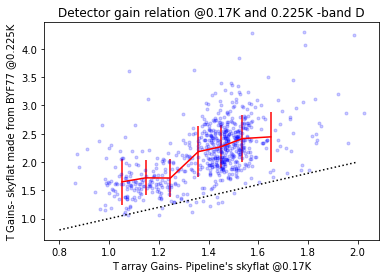

In [275]:
plt.plot(df.PFT.values, df.TG.values, 'b.', alpha=0.2)
plt.plot([0.8,2],[0.8,2], 'k:')

plt.title('Detector gain relation @0.17K and 0.225K -band D')
plt.xlabel("T array Gains- Pipeline's skyflat @0.17K")
plt.ylabel("T Gains- skyflat made from BYF77 @0.225K")

PFT = df.PFT.values
TG = df.TG.values


x = []
y = []
yerr = []

for i in np.arange(1,1.6,0.1):
    
    inx = ((i < PFT) & (PFT <= i + 0.1))
    x.append(np.nanmean(PFT[inx]))
    y.append(np.nanmean(TG[inx]))
    yerr.append(np.nanstd(TG[inx]))
    
plt.errorbar(x, y, yerr=yerr, color='red')



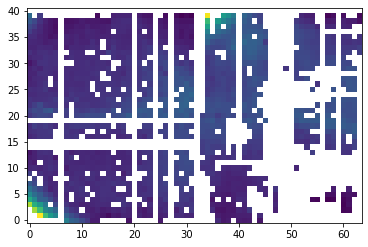

In [105]:
plt.imshow(pfr, origin='lower')

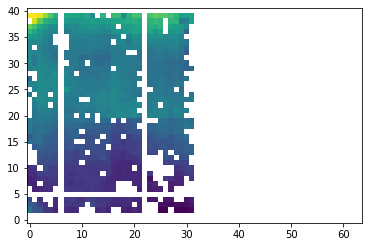

In [106]:
plt.imshow(pft, origin='lower')

In [48]:
np.sum(~np.isnan(sumT)), 64*41 - np.sum(sumT==0), 64*41 - np.sum(sumR==0),

(2624, 723, 1098)

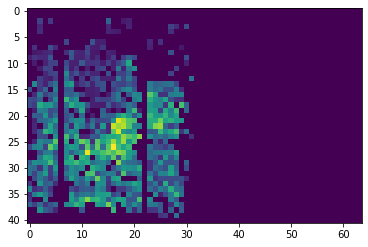

In [49]:
plt.imshow(sumT)

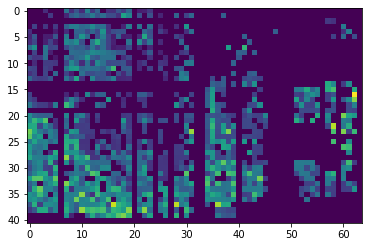

In [50]:
plt.imshow(sumR)

In [ ]:
mydict = {for p in [p45,p451,p46,p47,p48,p49,p50] }